# Elevator Position Estimation Using 1D Kalman Filter

By Fabiano Junior Maia Manschein

For the Robotic Perception class of Toyohashi University of Tecnology

Imaging and Light in Extended Reality (IMLEX) Master Program, 2023

https://github.com/Fabulani/1d_kalman_filter

## Requirements

In [ ]:
!pip install numpy ipywidgets filterpy

## Problem definition

Imagine an elevator moving within a building, and you have a sensor that measures the elevator's position within the shaft. However, due to sensor inaccuracies or environmental factors, the sensor measurements contain noise and uncertainties.

## Goal

The objective is to implement a 1D Kalman Filter to estimate the elevator's position accurately despite the noisy sensor measurements.

## Steps to implement

1. Data Generation:
- Simulate the elevator's true position along the building shaft. This data will serve as the ground truth.
- Introduce artificial noise or uncertainty into the data to mimic the sensor measurements.

2. Kalman Filter Implementation:
- Utilize the FilterPy Python library.
- Set up the initial state of the Kalman Filter.
- Define parameters for process noise (representing the uncertainty in the elevator's movement) and measurement noise (representing sensor inaccuracies).
- Iterate through the simulated sensor measurements, applying the Kalman Filter to estimate the elevator position at each measurement instance.
- Store the estimated positions obtained from the Kalman Filter.

3. Animation:
- Animate an elevator moving up and down, with the Kalman Filter estimating its position.

# Data Generation

The goal here is simple. Write a simple script to simulate an elevator moving along a shaft, with noisy sensors feeding-off position data. We'll have the ground truth data separated from the noisy data.

In this case, we assume a constant velocity model.

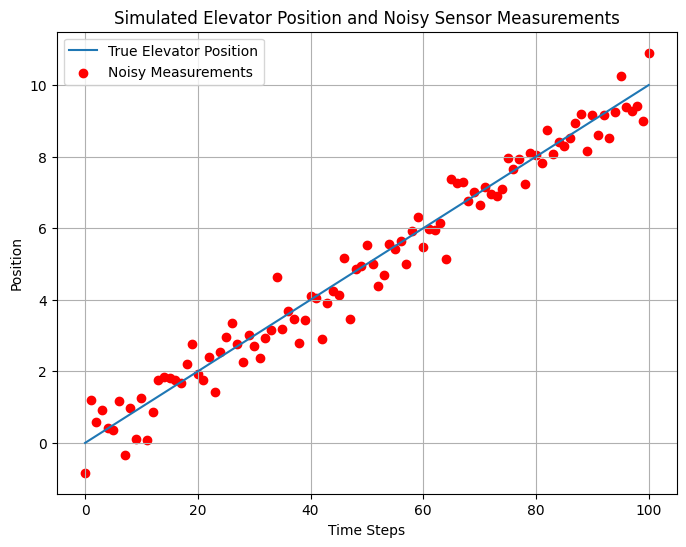

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_elevator_data(num_steps, initial_position=0, velocity=0.1, measurement_noise_std=0.5):
    # Simulate true elevator positions over time
    true_positions = [initial_position + velocity * t for t in range(num_steps)]

    # Add noise to simulate sensor measurements
    noisy_measurements = [pos + np.random.normal(scale=measurement_noise_std) for pos in true_positions]

    return true_positions, noisy_measurements

# Generate data for 100 time steps with default parameters
num_steps = 101
true_positions, noisy_measurements = generate_elevator_data(num_steps)

# Plot true elevator positions and noisy sensor measurements
plt.figure(figsize=(8, 6))
plt.plot(range(num_steps), true_positions, label='True Elevator Position')
plt.scatter(range(num_steps), noisy_measurements, color='red', label='Noisy Measurements')
plt.xlabel('Time Steps')
plt.ylabel('Position')
plt.title('Simulated Elevator Position and Noisy Sensor Measurements')
plt.legend()
plt.grid(True)
plt.show()


# Kalman Filter Implementation

For each measurement in `noisy_measurements`, the Kalman Filter performs the prediction step (`kf.predict()`) to estimate the next state and the update step (`kf.update(measurement)`) to correct the prediction based on the noisy measurement.

The filtered estimates of the elevator's position are stored in the `filtered_positions` list, and the final visualization plots the true elevator positions, noisy sensor measurements, and the filtered estimates obtained from the Kalman Filter over time.

The graph shows the `filterpy` Kalman Filter performance. The shaded green area is the estimated covariance.

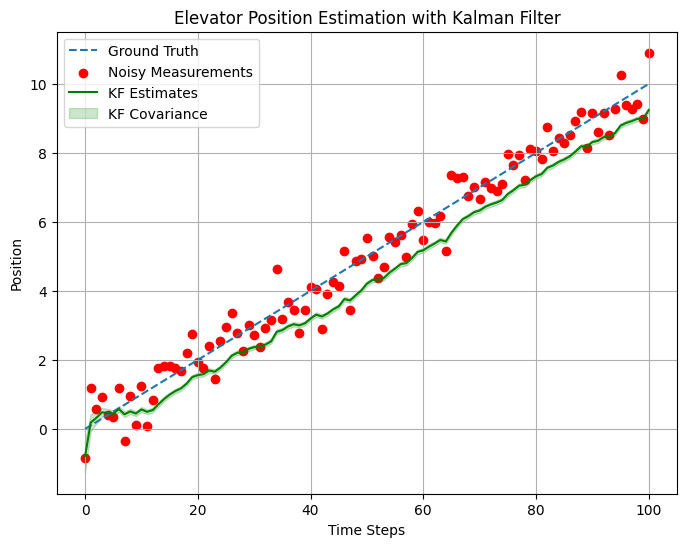

In [2]:
from filterpy.kalman import KalmanFilter

def apply_kf(noisy_measurements):
    # Initialize Kalman Filter
    kf = KalmanFilter(dim_x=1, dim_z=1)  # 1D Kalman Filter
    kf.x = np.array([0.0])  # Initial state estimate
    kf.F = np.array([[1.0]])  # State transition matrix (constant velocity model)
    kf.H = np.array([[1.0]])  # Measurement matrix
    kf.P *= 10.0  # Initial state covariance matrix
    kf.R *= 0.5  # Measurement noise covariance matrix
    kf.Q = np.eye(1) * 0.01  # Process noise covariance matrix

    # Perform Kalman filtering
    kf_estimates = []
    kf_cov = []
    for measurement in noisy_measurements:
        kf.predict()  # Prediction step
        kf.update(measurement)  # Correction step
        kf_estimates.append(kf.x[0])  # Estimated position
        kf_cov.append(kf.P[0, 0])  # Estimated Covariance
    return kf_estimates, kf_cov

kf_estimates, kf_cov = apply_kf(noisy_measurements)

# Plot true elevator positions, noisy measurements, and filtered estimates
plt.figure(figsize=(8, 6))
plt.plot(range(num_steps), true_positions, label='Ground Truth', linestyle='--')
plt.scatter(range(num_steps), noisy_measurements, color='red', label='Noisy Measurements')
plt.plot(range(num_steps), kf_estimates, color='green', label='KF Estimates')
# Covariance as shaded region
plt.fill_between(range(num_steps), np.array(kf_estimates) - np.array(kf_cov),
                 np.array(kf_estimates) + np.array(kf_cov),
                 alpha=0.2, color='green', label='KF Covariance')

plt.xlabel('Time Steps')
plt.ylabel('Position')
plt.title('Elevator Position Estimation with Kalman Filter')
plt.legend()
plt.grid(True)
plt.show()

About the KF parameters:
1. **`dim_x=1` and `dim_z=1`:**
   - `dim_x=1` specifies that our state space is one-dimensional (representing the elevator's position).
   - `dim_z=1` indicates that our measurement space is also one-dimensional (one sensor measuring the elevator's position).

2. **Initial State (`kf.x`):**
   - `kf.x = np.array([0.0])`: We initialize the initial estimated state of the elevator's position as 0.0. This represents our initial belief about where the elevator is when starting the filtering process.

3. **State Transition Matrix (`kf.F`):**
   - `kf.F = np.array([[1.0]])`: Given a constant velocity model (1D), the state transition matrix `F` denotes how the state evolves over time. Here, it's a simple representation where the elevator's position evolves linearly with time (no change in velocity).

4. **Measurement Matrix (`kf.H`):**
   - `kf.H = np.array([[1.0]])`: The measurement matrix `H` relates the true state to the observed measurements. In this case, the sensor directly measures the elevator's position.

5. **Initial Covariance Matrix (`kf.P`):**
   - `kf.P *= 10.0`: The initial state covariance matrix represents our uncertainty about the initial state estimate. Setting it to a higher value (e.g., 10.0) implies higher uncertainty in our initial estimate.

6. **Measurement Noise Covariance (`kf.R`):**
   - `kf.R *= 0.5`: This matrix represents the covariance of the noise in the sensor measurements. A lower value (e.g., 0.1) signifies less uncertainty in the sensor measurements.

7. **Process Noise Covariance (`kf.Q`):**
   - `kf.Q = np.eye(1) * 0.01`: The process noise covariance matrix represents the uncertainty in the system's dynamics. Here, a small value (e.g., 0.01) suggests low uncertainty in the elevator's movement dynamics.


# Animation

In this animation, 
- the blue box is the true elevator, with the blue circle being the ground truth elevator true position `GT`.
- the green X is the noisy sensor measurement `NM`.
- the red box is the elevator estimated by the Kalman Filter, with the red triangle being the estimated elevator position `KF`.

The elevator starts at the ground floor (0), goes up to the 10th floor, stops for 3s, then goes down until the ground floor again.

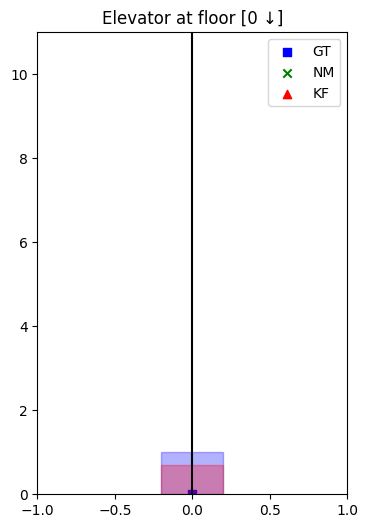

In [3]:
from IPython.display import display, clear_output
import math


def simulate_elevator_movement(total_floors, num_steps_per_floor, max_loops, filter_function):
    going_up = True  # 1 for moving up, -1 for moving down
    arrow = "↑"
    num_loops = 0  # Number of times the elevators looped (went up or down)

    # Generate elevator data
    num_steps = num_steps_per_floor * total_floors + 1  # +1 so that the last true position is 10 for the 10th floor
    true_positions, noisy_measurements = generate_elevator_data(num_steps, measurement_noise_std=0.2)

    # Apply Kalman Filter
    kf_estimates, _ = filter_function(noisy_measurements)

    fig, ax = plt.subplots(figsize=(4, 6))

    i = 0
    while i < num_steps and num_loops < max_loops:
        ax.clear()
        ax.set_xlim(-1, 1)
        ax.set_ylim(0, total_floors + 1)

        # Show correct floor as the title
        f = math.floor if going_up else math.ceil
        ax.set_title(f"Elevator at floor [{f(true_positions[i])} {arrow}]")

        # Elevator shaft
        ax.plot([0, 0], [0, total_floors + 1], color='black')

        # True elevator position
        elevator_pos = true_positions[i]
        ax.fill(
            [-0.2, 0.2, 0.2, -0.2], 
            [elevator_pos, elevator_pos, elevator_pos + 1, elevator_pos + 1], 
            color='blue', 
            alpha=0.3,
        )  # This draws the elevator box
        ax.scatter(
            0, 
            true_positions[i], 
            color='blue', 
            label='GT',
            marker='s'
        )  # This draws a dot at the ground truth point

        # Noisy measurements
        ax.scatter(0, 
                   noisy_measurements[i], 
                   color='green', 
                   label='NM', 
                   marker='x'
        )

        # Kalman filter estimates
        kf_pos = kf_estimates[i]  
        ax.fill(
            [-0.2, 0.2, 0.2, -0.2], 
            [kf_pos, kf_pos, kf_pos + 1, kf_pos + 1], 
            color='red', 
            alpha=0.3, 
        )  # Draw red box for KF estimate of the elevator
        ax.scatter(
            0, 
            kf_estimates[i], 
            color='red', 
            label='KF',
            marker='^'
        )  # This draws a dot at the KF estimation point

        ax.legend()
        display(fig)
        clear_output(wait=True)
        plt.pause(0.001)

        # Elevator switches direction when at the top or bottom
        if (going_up and i == num_steps-1) or (not going_up and i == 0):
            going_up = not going_up
            arrow = "↑" if going_up else "↓"
            num_loops += 1
            plt.pause(3)

        # Increment or decrement counter depending on direction
        i = i+1 if going_up else i-1

    plt.close()

# Run the elevator simulation
simulate_elevator_movement(10, 10, max_loops=2, filter_function=apply_kf)


# Discussion

The Kalman Filter provided by the `filterpy` does not estimate the elevator position well. It always underestimates the real value. I tried changing the filter parameters to no success.

To solve this problem, I decided to implement the Kalman Filter myself.

# My Kalman Filter

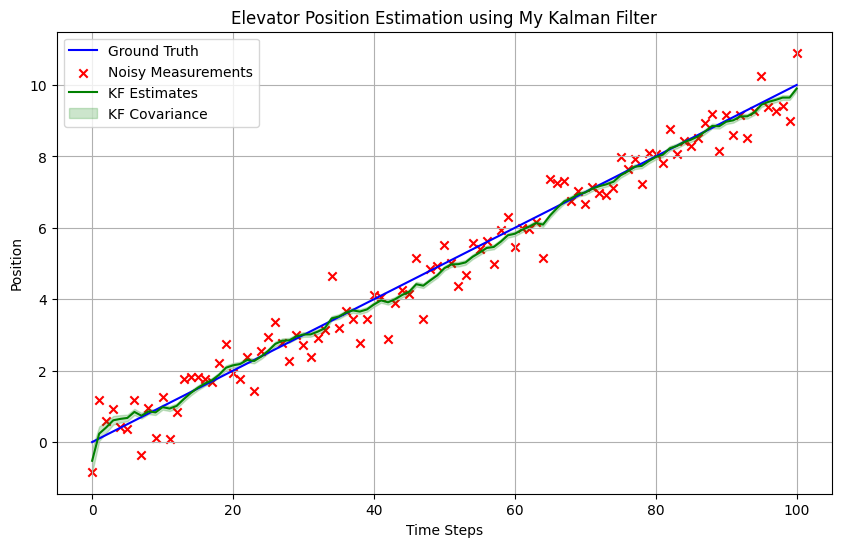

In [4]:
def apply_my_kf(noisy_measurements):
    # Define initial state and covariance
    initial_state = np.array([[0.0]])  # Initial state [position]
    initial_covariance = np.array([[1.0]])  # Initial covariance matrix

    # Define process noise and measurement noise
    process_noise = 0.01  # Process noise covariance
    measurement_noise = 0.5  # Measurement noise covariance

    # Define state transition function (linear motion with constant velocity)
    def state_transition_function(x, dt):
        velocity = 0.1  # Constant velocity
        return x + velocity * dt

    # Define observation function (identity observation model)
    def observation_function(x):
        return x

    # Define Kalman Filter steps
    def kalman_filter(current_state, current_covariance, measurement):
        # Prediction step
        predicted_state = state_transition_function(current_state, dt=1)
        F = np.array([[1.0]])  # State transition matrix (Jacobian)
        predicted_covariance = F.dot(current_covariance).dot(F.T) + process_noise

        # Correction step
        innovation = measurement - observation_function(predicted_state)
        H = np.array([[1.0]])  # Observation matrix (Jacobian)
        innovation_covariance = H.dot(predicted_covariance).dot(H.T) + measurement_noise
        kalman_gain = predicted_covariance.dot(H.T).dot(np.linalg.inv(innovation_covariance))

        corrected_state = predicted_state + kalman_gain.dot(innovation)
        corrected_covariance = (np.eye(len(predicted_state)) - kalman_gain.dot(H)).dot(predicted_covariance)

        return corrected_state, corrected_covariance

    # Run Kalman Filter for elevator estimation
    current_state = initial_state
    current_covariance = initial_covariance
    kf_estimates = []
    kf_cov = []

    for measurement in noisy_measurements:
        current_state, current_covariance = kalman_filter(current_state, current_covariance, measurement)
        kf_estimates.append(current_state[0, 0])
        kf_cov.append(current_covariance[0, 0])
    
    return kf_estimates, kf_cov

kf_estimates, kf_cov = apply_my_kf(noisy_measurements)

# Plotting
plt.figure(figsize=(10, 6))

# True positions
plt.plot(true_positions, label='Ground Truth', color='blue')

# Noisy measurements
plt.scatter(range(num_steps), noisy_measurements, label='Noisy Measurements', color='red', marker='x')

# Estimated positions from Kalman Filter
plt.plot(kf_estimates, label='KF Estimates', color='green')

# Covariance as shaded region
plt.fill_between(range(num_steps), np.array(kf_estimates) - np.array(kf_cov),
                 np.array(kf_estimates) + np.array(kf_cov),
                 alpha=0.2, color='green', label='KF Covariance')

plt.xlabel('Time Steps')
plt.ylabel('Position')
plt.title('Elevator Position Estimation using My Kalman Filter')
plt.legend()
plt.grid(True)
plt.show()

This seems much better. Now, for the animation.

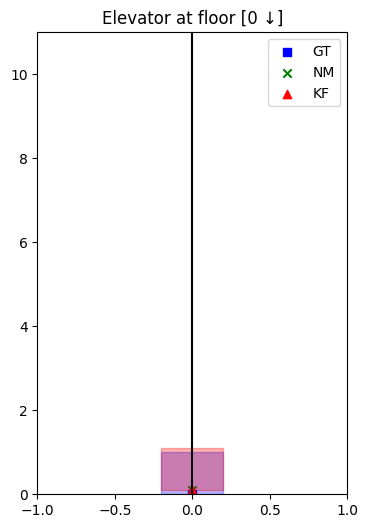

In [5]:
# Run the elevator simulation
simulate_elevator_movement(10, 10, max_loops=2, filter_function=apply_my_kf)

The enhanced performance of this iteration using the Kalman Filter for 1D elevator position estimation is quite evident. While effective for this simple problem, in practical scenarios, a more robust and precise algorithm becomes imperative. Elevator positioning demands utmost accuracy, as minor errors could lead to significant safety hazards—such as passengers tripping due to a slight misalignment between the elevator and door positions.

However, the Kalman Filter, despite its simplicity, offers noteworthy advantages. Its real-time processing capability, low computational requirements, and well-established reliability make it a valuable solution. When considering systems demanding a balance between efficiency and accuracy, the Kalman Filter should not be dismissed but rather explored further for its potential to address specific elevator positioning challenges.